In [179]:
import tensorflow as tf
import numpy as np

In [180]:
#Tabla de Entrenamiento
SPO2 = np.array([98, 97, 92, 96, 99, 93, 98, 94, 97, 92, 95, 
                 99, 94, 97, 94, 95, 97, 96, 98, 96, 97, 98, 96, 
                 97, 97, 96, 96, 99, 97, 98], dtype=float) # % Spo2
Hb = np.array([15.4, 13.9, 9.4, 14.7, 13.1, 10.2, 12, 10.8, 11.3,
               10.4, 11.3, 16.8, 13.8, 13.4, 14.9, 11.8, 14.5, 
               12.4, 11.7, 15.7, 14, 13.4, 13.9, 13.9, 13, 12.9, 
               12.5, 16.4, 14, 15.9], dtype=float) #Nivel Hb Invasivo

In [181]:
#entrada = tf.keras.layers.Dense(units=1, input_shape=[1])

oculta1 = tf.keras.layers.Dense(units=2, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=1)

salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([ oculta1, oculta2, salida])

In [182]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [183]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 4         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [184]:
print("Entrenando Red Neuronal...")
historial = modelo.fit(SPO2, Hb, epochs= 100, verbose=False)
print("Red neuronal entrenada!")

Entrenando Red Neuronal...
Red neuronal entrenada!


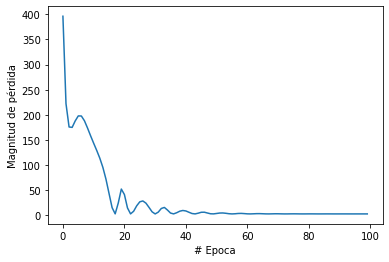

In [185]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [186]:
print("Sistema de Red Neuronal Hb No Invasivo")
resultado = modelo.predict([ 66 ])
print("Resultado" + str(resultado) + "Hb")

Sistema de Red Neuronal Hb No Invasivo
Resultado[[9.9962635]]Hb


In [187]:
print("Variables internas del modelo")
#print(entrada.get_weights())
print("oculta1:",oculta1.get_weights())
print("oculta2:",oculta2.get_weights())
print("salida:",salida.get_weights())

Variables internas del modelo
oculta1: [array([[-0.9728594 , -0.03281363]], dtype=float32), array([-1.5597897, -0.8873913], dtype=float32)]
oculta2: [array([[-0.4332955 ],
       [ 0.25875148]], dtype=float32), array([0.876817], dtype=float32)]
salida: [array([[0.2646474]], dtype=float32), array([2.4315758], dtype=float32)]


In [188]:
historial = modelo.fit(SPO2, Hb, epochs= 100, batch_size=16, validation_data=(SPO2, Hb))

Epoch 1/100
2/2 [==============================] - 0s 164ms/step - loss: 3.1116 - val_loss: 2.9890
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 3.0270 - val_loss: 3.0372
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 3.1223 - val_loss: 2.9888
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 3.0557 - val_loss: 2.9923
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 3.1599 - val_loss: 2.9888
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 3.0202 - val_loss: 3.0936
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 3.0884 - val_loss: 3.0184
Epoch 8/100
2/2 [==============================] - 0s 37ms/step - loss: 3.0311 - val_loss: 3.0236
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: 3.0664 - val_loss: 3.0083
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 3.1177 - val_loss: 3.0158
Epoch 11/100
2/2 [

In [189]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [190]:


converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_gen():
    for _ in range(150):
        yield [
            np.array(
                [np.random.uniform(0,100,None)]
            , dtype=np.float32)
        ]
print(representative_dataset_gen())

converter.representative_dataset = representative_dataset_gen

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_quant_model = converter.convert()
open("/content/gdrive/My Drive/converted_model.tflite", "wb").write(tflite_quant_model)



<generator object representative_dataset_gen at 0x7fee34b0d4d0>
INFO:tensorflow:Assets written to: /tmp/tmpcgcmd6f_/assets


INFO:tensorflow:Assets written to: /tmp/tmpcgcmd6f_/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2184

In [194]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/gdrive/My Drive/converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
input_data =  np.array( [[88.0]] , dtype=np.float32) 
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[12.565241]]


In [193]:
print("Sistema de Red Neuronal Hb No Invasivo")
resultado = modelo.predict([88])
print("Resultado" + str(resultado) + "Hb")

Sistema de Red Neuronal Hb No Invasivo
Resultado[[12.605691]]Hb


In [ ]:
!xxd -i converted_model.tflite > model_data.cc